In [1]:
#importing required libraries into python
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis,skew
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore') 

In [2]:
iris1 = pd.read_csv("C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\Assignment 657\\Iris\\Rawdata\\iris_dataset_missing.csv")
iris1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [3]:
iris1['species'].value_counts()

Iris-setosa        35
Iris-virginica     35
Iris-versicolor    35
Name: species, dtype: int64

### [CM1] Pair plot for IRIS Dataset

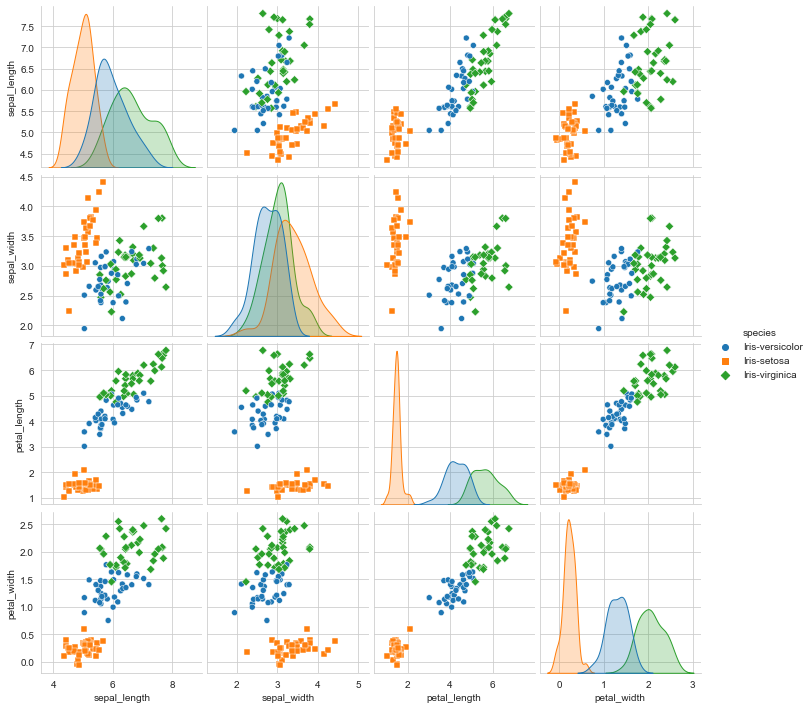

In [4]:
#pair-plot
sns.set_style("whitegrid")
sns.pairplot(iris1,hue='species',markers=["o", "s", "D"]);

#### Q1.1) [CM1] 

Considering the upper triangle in the above pair plot, below are our obeservations:

1) petal_length and petal_width seem to have strong correlation 
 2) sepal_length and petal_length also seem to be correlated

#### Q1.2) [CM1] 

From the subplot between petal_length and petal_width, we have noticed that as petal_kength increases, petal_width increases and vice versa. Also, the values are not much dispersed. Hence, we can say that both  are strongly correlated. 

The plot between sepal_length and petal_length shows a linear relation but there is some dispersion of values which will make these two moderately correlated.

### [CM5] Data Cleaning

In [5]:
iris1.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    8
petal_width     0
species         0
dtype: int64

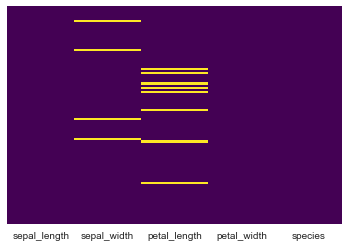

In [6]:
sns.heatmap(iris1.isnull(),yticklabels=False,cbar=False,cmap='viridis');

The heatmap above clearly shows where the missing values are in the dataset

In [7]:
iris1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


The above table shows that there are negative values in the column petal_width

In [8]:
iris1[(iris1.petal_width<0)]

,sepal_length,sepal_width,petal_length,petal_width,species
6,4.81174,3.037915,1.494268,-0.042428,Iris-setosa
67,4.86021,3.071128,1.487504,-0.072203,Iris-setosa


We are removing the rows with petal_width having negative values in the data since width should be a non negative value

In [9]:
#Removing the rows with negative petal_width values
iris2 = iris1[(iris1.petal_width>=0)]
iris2.shape

(103, 5)

In [10]:
#Segregating the data on basis of species and replacing the missing values with corresponding medians
iris_vc=iris2.query('species=="Iris-versicolor"')
iris_vcf =iris_vc.fillna(iris_vc.median())
iris_s=iris2.query('species=="Iris-setosa"')
iris_sf = iris_s.fillna(iris_s.median())
iris_v=iris2.query('species=="Iris-virginica"')
iris_vf = iris_v.fillna(iris_v.median())
iris_f = iris_vcf.append([iris_sf,iris_vf])
iris_f.shape

(103, 5)

The dataset is segreggated based on species and are replaced with correspinding medians.
For continuous data, mean is influenced by outliers and so we used median to replace the missing values.

### 1.3 [CM3]

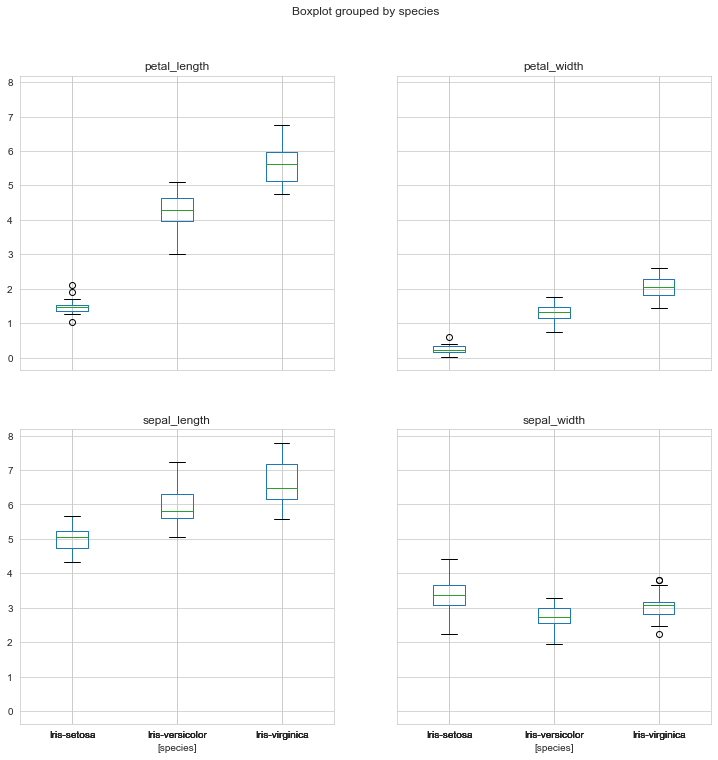

In [11]:
#Box plot to check for the outliers in the data
iris_f.boxplot(by='species', figsize = (12,12));

There are outliers in the columns petal_length, petal_width and sepal_width

In [12]:
# The outliers for each feature of the species are found and are replaced with closest boundary value(Upper or lower)

iris_vc2=iris_f.query('species=="Iris-versicolor"')
iris_s2=iris_f.query('species=="Iris-setosa"')
iris_s2.sort_values(by=['petal_length'])
irisf_spl = iris_s2['petal_length']
quantile1spl, quantile3spl= np.percentile(irisf_spl,[25,75])
iqr_valuespl=quantile3spl-quantile1spl
outliers_spl = iris_s2[(iris_s2.petal_length>(quantile3spl +(1.5 * iqr_valuespl))) | (iris_s2.petal_length<(quantile1spl -(1.5 * iqr_valuespl)))]
iris_s2['petal_length'] = np.where(iris_s2.petal_length<(quantile1spl -(1.5 * iqr_valuespl)), quantile1spl -(1.5 * iqr_valuespl), iris_s2.petal_length)
iris_s2['petal_length'] = np.where(iris_s2.petal_length>(quantile3spl +(1.5 * iqr_valuespl)), quantile3spl +(1.5 * iqr_valuespl), iris_s2.petal_length)


iris_s2.sort_values(by=['petal_width'])
irisf_spw = iris_s2['petal_width']
quantile1spw, quantile3spw= np.percentile(irisf_spw,[25,75])
iqr_valuespw=quantile3spw-quantile1spw
outliers_spw = iris_s2[(iris_s2.petal_width>(quantile3spw +(1.5 * iqr_valuespw))) | (iris_s2.petal_width<(quantile1spw -(1.5 * iqr_valuespw)))]
iris_s2['petal_width'] = np.where(iris_s2.petal_width<(quantile1spw -(1.5 * iqr_valuespw)), quantile1spw -(1.5 * iqr_valuespw), iris_s2.petal_width)
iris_s2['petal_width'] = np.where(iris_s2.petal_width>(quantile3spw +(1.5 * iqr_valuespw)), quantile3spw +(1.5 * iqr_valuespw), iris_s2.petal_width)

iris_v2=iris_f.query('species=="Iris-virginica"')
iris_v2.sort_values(by=['sepal_width'])
irisf_vsw = iris_v2['sepal_width']
quantile1vsw, quantile3vsw= np.percentile(irisf_vsw,[25,75])
iqr_valuevsw=quantile3vsw-quantile1vsw
outliers_vsw = iris_v2[(iris_v2.sepal_width>(quantile3vsw +(1.5 * iqr_valuevsw))) | (iris_v2.sepal_width<(quantile1vsw -(1.5 * iqr_valuevsw)))]
iris_v2['sepal_width'] = np.where(iris_v2.sepal_width<(quantile1vsw -(1.5 * iqr_valuevsw)), quantile1vsw -(1.5 * iqr_valuevsw), iris_v2.sepal_width)
iris_v2['sepal_width'] = np.where(iris_v2.sepal_width>(quantile3vsw +(1.5 * iqr_valuevsw)), quantile3vsw +(1.5 * iqr_valuevsw), iris_v2.sepal_width)

print('Below are the rows in the data containing outliers\n')
print("petal width: \n" ,outliers_spw)
print("petal length: \n" ,outliers_spl)
print("sepal width v: \n" ,outliers_vsw)

iris_f2 = iris_vc2.append([iris_s2,iris_v2])


Below are the rows in the data containing outliers

petal width: 
     sepal_length  sepal_width  petal_length  petal_width      species
79       5.03385     3.742203      1.805112     0.594614  Iris-setosa
petal length: 
     sepal_length  sepal_width  petal_length  petal_width      species
46      4.736073     3.482242      1.919475     0.262137  Iris-setosa
79      5.033850     3.742203      2.103637     0.594614  Iris-setosa
80      4.344007     3.018625      1.033031     0.104012  Iris-setosa
sepal width v: 
     sepal_length  sepal_width  petal_length  petal_width         species
38      7.665933     3.802924      6.463494     2.086840  Iris-virginica
42      5.959186     2.227918      5.189638     1.453949  Iris-virginica
77      7.540961     3.797087      6.617141     2.051317  Iris-virginica


The outliers present in the data are close to the boundary values as inferred from the boxplot.
Removing them will reduce the data size for training and hence the outliers are replaced with the nearest boundary values (upper or lower)

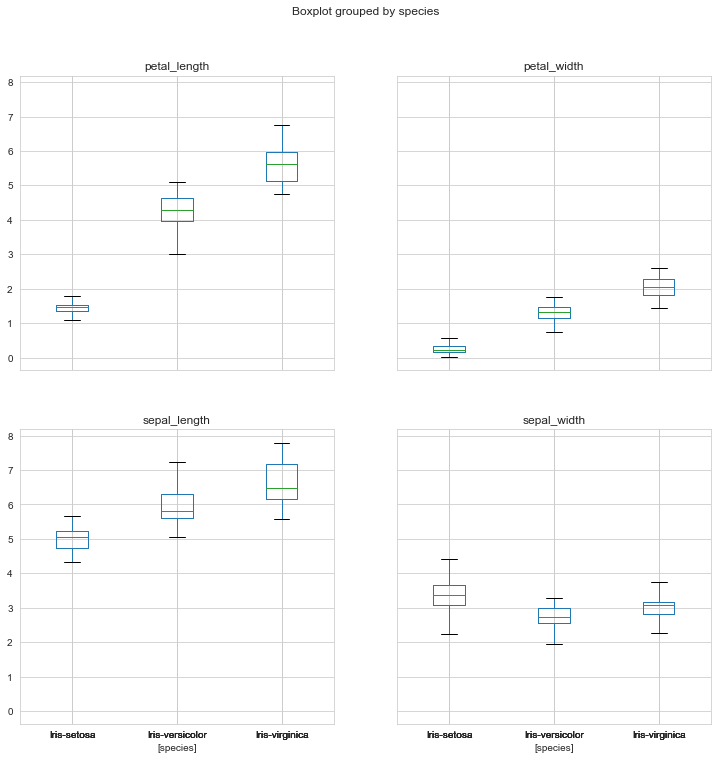

In [13]:
#Box plot to check if the outliers are removed
iris_f2.boxplot(by='species', figsize = (12,12));

Above is the boxplot with no outliers

### 1.3 [CM2] 

Below table shows the pearson correlation coefficients between features

In [14]:
iris_f2.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.049713,0.868992,0.804073
sepal_width,-0.049713,1.000000,-0.344420,-0.285166
petal_length,0.868992,-0.344420,1.000000,0.954184
petal_width,0.804073,-0.285166,0.954184,1.000000


From the above correlation table, 
petal_length and petal_width has strong positive correlation with a coefficient of 0.95.
sepal_length with petal_length and sepal_length with petal_width also have positive correlations.

Between petal_length and petal_width, we can choose only one feature for classification as their correlation coefficient is almost equal to one.
With the help of petal_length or petal_width we can easily classify one species from other two species

###  1.4 [CM2] 

In [15]:
np.mean(iris_f2)

sepal_length    5.878772
sepal_width     3.055221
petal_length    3.847953
petal_width     1.224005
dtype: float64

In [16]:
np.var(iris_f2)

sepal_length    0.728903
sepal_width     0.201788
petal_length    3.160370
petal_width     0.594549
dtype: float64

Petal_length has high variance unlike other features. This indicates that the data points tend to be very far from the mean.

In [17]:
print("skewness of sepal_length: {:.4f}".format(skew(iris_f2['sepal_length'])))
print("skewness of sepal_width: {:.4f}".format(skew(iris_f2['sepal_width'])))
print("skewness of petal_length: {:.4f}".format(skew(iris_f2['petal_length'])))
print("skewness of petal_width: {:.4f}".format(skew(iris_f2['petal_width'])))

skewness of sepal_length: 0.3724
skewness of sepal_width: 0.3719
skewness of petal_length: -0.2959
skewness of petal_width: -0.0895


The skew values for columns sepal_length and sepal_width are > zero. Hence the distributions of these columns are Positively skewed.
The skew values for columns petal_length and petal_width are < zero. Hence the distributions of these columns are Negatively skewed.

Skewness of petal_width is near to zero and hence it's distribution can be symmetrical.

In [18]:
print("Excess Kurtosis of sepal_length: {:.4f}".format(kurtosis(iris_f2['sepal_length'])))
print("Excess Kurtosis of sepal_width: {:.4f}".format(kurtosis(iris_f2['sepal_width'])))
print("Excess Kurtosis of petal_length: {:.4f}".format(kurtosis(iris_f2['petal_length'])))
print("Excess Kurtosis of petal_width: {:.4f}".format(kurtosis(iris_f2['petal_width'])))

Excess Kurtosis of sepal_length: -0.5629
Excess Kurtosis of sepal_width: 0.4325
Excess Kurtosis of petal_length: -1.3658
Excess Kurtosis of petal_width: -1.2959


The Excess kurtosis values for the features sepal_length, petal_length, petal_width are < zero. Hence the distributions of these features are Platykurtic which means they have flat tails.
However, the excess kurtosis value for the feature sepal_width is > zero. Hence the distribution of this feature is leptokurtic with heavy tails.

### 2.1

In [19]:
#Dividiing each dataset into features(X) and target(Y)
target=["species"]
cols=[col for col in iris_f2.columns if col not in target]

x=iris_f2[cols]
y=iris_f2[target]

#Splitting the data into train, validation, and test sets (60%, 20%, 20%)
train_valid_x, test_x, train_valid_y, test_y = train_test_split(x, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

#Creating an instance of the classifier
Knc=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

#Fit the classifier to training data
Knc.fit(train_x,train_y)

KNeighborsClassifier()

### 2.2

In [20]:
#The model is tested on test data
test = Knc.predict(test_x)

acc_k_5 = metrics.accuracy_score(test_y,test)
print('Accuracy of model on test data: {:.2f}'.format(acc_k_5))


Accuracy of model on test data: 0.95


### 2.3

In [21]:
#From the given set of k values, finding the best k
k_val = [1,5,10,15,20,25,30,35]
res_list = []
for k in k_val:
    z=KNeighborsClassifier(n_neighbors=k)
    z.fit(train_x,train_y)
    n=z.predict(valid_x)
    res = round(metrics.accuracy_score(valid_y,n),2)
    res_list.append(res)
df= pd.DataFrame(res_list,k_val,columns = ['Accuracy scores on Validation data'])
df

,Accuracy scores on Validation data
1,0.90
5,0.90
10,0.90
15,0.90
20,0.95
25,0.90
30,0.90
35,0.57


### 2.3 [CM6]

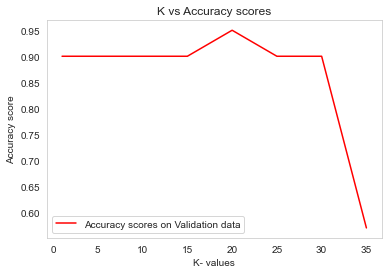

In [22]:
#Plot graph for different k values and corresponding accuracy scores
df.plot(color='red');
plt.grid();
plt.title('K vs Accuracy scores');
plt.xlabel('K- values');
plt.ylabel('Accuracy score');

For K=20, we have the highest accuracy score on validation data. Choosing k=20 for further calculations

### 2.4 [CM7]

In [23]:
#Fitting the model with train data and testing on test set with k=20
z=KNeighborsClassifier(n_neighbors=20)
z.fit(train_x,train_y)
n=z.predict(test_x)
pred_y= z.predict_proba(test_x)
res=(metrics.accuracy_score(test_y, n))
print('Accuracy of the Classifier for K=20: {:.2f}'.format(res))

f1score=f1_score(test_y, n, average='macro')
print("F1-Score is : {:.2f}".format(f1score))

y1=np.where(test_y=='Iris-setosa',0,np.where(test_y=='Iris-versicolor',1,np.where(test_y=='Iris-virginica',2,test_y)))
y1=y1.astype(str).astype(int)
auc = roc_auc_score(y1,pred_y,multi_class="ovr")
print('AUC of model on test data: {:.2f}'.format(auc))

Accuracy of the Classifier for K=20: 0.90
F1-Score is : 0.92
AUC of model on test data: 0.99


### 2.5

In [24]:
#Using Standardization

x=iris_f2[cols]
y=iris_f2[target]
scale = StandardScaler()
modified_x = scale.fit_transform(x)
x_df = pd.DataFrame(modified_x,columns = ['sepal_length', 'sepal_width','petal_length','petal_width'])

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(x_df, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(valid_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(valid_y,test)
print('Accuracy of model on validation data after standardization: {:.2f}'.format(acc_k))


Accuracy of model on validation data after standardization: 0.90


In [25]:
#Using Normalization (Min Max)

x=iris_f2[cols]
y=iris_f2[target]
scale = MinMaxScaler()
modified_x = scale.fit_transform(x)
x_df = pd.DataFrame(modified_x,columns = ['sepal_length', 'sepal_width','petal_length','petal_width'])

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(x_df, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(valid_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(valid_y,test)
print('Accuracy of model on validation data after Normalization: {:.2f}'.format(acc_k))


Accuracy of model on validation data after Normalization: 0.95


We have used Standardization and Min Max Normalization techniques on the dataset. For Standardization the accuracy of the model was 90% and when Normalized, the accuracy was 95%. So in this case Normalization on the dataset gave better accuracy.

### 2.6

In [26]:
#Accuracy using Normalized data, weights = "distance" using "Manhatten Distance" i.e p=1

x=iris_f2[cols]
y=iris_f2[target]
scale = MinMaxScaler()
modified_x = scale.fit_transform(x)
x_df = pd.DataFrame(modified_x,columns = ['sepal_length', 'sepal_width','petal_length','petal_width'])

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(x_df, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=20, weights='distance', algorithm='auto',leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(valid_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(valid_y,test)
print('Accuracy of model on validation data after Normalization with modified weights: {:.2f}'.format(acc_k))


Accuracy of model on validation data after Normalization with modified weights: 0.90


In [27]:
#Accuracy using Normalized data, weights = "distance" using "Euclidean distance " i.e p=2

x=iris_f2[cols]
y=iris_f2[target]
scale = MinMaxScaler()
modified_x = scale.fit_transform(x)
x_df = pd.DataFrame(modified_x,columns = ['sepal_length', 'sepal_width','petal_length','petal_width'])

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(x_df, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=20, weights='distance', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(valid_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(valid_y,test)
print('Accuracy of model on test data after Normalization with modified weights: {:.2f}'.format(acc_k))


Accuracy of model on test data after Normalization with modified weights: 0.90


We have modified the weights and power parameter for the classifier. For weights = 'distance' and p=1 (Manhatten Distance), the accuracy of the classifer is 90%, for weights = 'distance' and p=2 (Euclidean Distance), the accuracy of the classifer is also 90%.

Changing the weights and p did not have any difference in the accuracy of the model

### 2.7 [CM7]

In [28]:
#Accuracy on test dataset after model improvement

x=iris_f2[cols]
y=iris_f2[target]
scale = MinMaxScaler()
modified_x = scale.fit_transform(x)
x_df = pd.DataFrame(modified_x,columns = ['sepal_length', 'sepal_width','petal_length','petal_width'])

#Splitting the data
train_valid_x, test_x, train_valid_y, test_y = train_test_split(x_df, y, test_size=0.2, random_state=275)
train_x,valid_x,train_y,valid_y=train_test_split(train_valid_x, train_valid_y, test_size=0.25, random_state=275)

#Training the model on train data
z=KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(train_x,train_y)

#Testing the model on test data
test = z.predict(test_x)
test_prob=z.predict_proba(test_x)

#Accuracy of model on test data
acc_k = metrics.accuracy_score(test_y,test)


print('Accuracy of improved model on test data: {:.2f}'.format(acc_k))

f1score=f1_score(test_y, test, average='macro')
print("F1-Score is : {:.2f}".format(f1score))

y1=np.where(test_y=='Iris-setosa',0,np.where(test_y=='Iris-versicolor',1,np.where(test_y=='Iris-virginica',2,test_y)))
y1=y1.astype(str).astype(int)
auc = roc_auc_score(y1,test_prob,multi_class="ovr")
print('AUC of improved model on test data: {:.2f}'.format(auc))

Accuracy of improved model on test data: 0.90
F1-Score is : 0.92
AUC of improved model on test data: 0.96
